In [3]:
import scanpy as sc
from genevector.data import GeneVectorDataset
from genevector.model import GeneVector
from genevector.embedding import GeneEmbedding, CellEmbedding

In [30]:
adata = sc.read("tica.h5ad")

In [5]:
dataset = GeneVectorDataset(adata)

Loading Expression.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2694738/2694738 [00:23<00:00, 114453.17it/s]


Reindexing Cooc


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24834/24834 [00:00<00:00, 40898.19it/s]


In [7]:
cmps = GeneVector(dataset,
                  output_file="tica.vec",
                  batch_size=200000,
                  initial_lr=0.1,
                  threshold=1e-9,
                  emb_dimension=100)

Generating inputs and outputs.


  0%|▎                                                                                                                                                                                                                                | 753/499500 [00:00<02:05, 3968.24it/s]/Users/ceglian/miniconda3/lib/python3.9/site-packages/numpy/lib/histograms.py:1124: RuntimeWarning: invalid value encountered in true_divide
  hist /= s
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 499500/499500 [01:42<00:00, 4865.67it/s]


Decomposing


1000it [00:01, 905.34it/s]


In [10]:
cmps.train(1000)
embed = GeneEmbedding("tica.vec", dataset,vector="average")
print(embed.compute_similarities("CD3D").head(20))

Epoch 398 	Delta-> 0.0008426308631896973 	Loss: 0.07066136300563812
Epoch 399 	Delta-> 0.00014343112707138062 	Loss: 0.07064695432782173
Epoch 400 	Delta-> 0.0003617778420448303 	Loss: 0.07062723835309347
Epoch 401 	Delta-> 0.0013253912329673767 	Loss: 0.07060388624668121
Epoch 402 	Delta-> 0.00025653839111328125 	Loss: 0.07056315429508686
Epoch 403 	Delta-> 0.0020416826009750366 	Loss: 0.07051894031465053
Epoch 404 	Delta-> 0.0001247301697731018 	Loss: 0.07047549299895764
Epoch 405 	Delta-> 0.00027376413345336914 	Loss: 0.07043583989143372
Epoch 406 	Delta-> 0.001218162477016449 	Loss: 0.07039319537580013
Epoch 407 	Delta-> 0.0009831339120864868 	Loss: 0.0703509084880352
Epoch 408 	Delta-> 0.0005840063095092773 	Loss: 0.07031038552522659
Epoch 409 	Delta-> 0.0022973939776420593 	Loss: 0.07026770487427711
Epoch 410 	Delta-> 0.0013082623481750488 	Loss: 0.07022686637938022
Epoch 411 	Delta-> 0.001048073172569275 	Loss: 0.07018639855086803
Epoch 412 	Delta-> 0.0017932131886482239 	Loss: 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 3844458.30it/s]

          Gene  Similarity
0         CD3D    1.000000
1         CD3E    0.744006
2          CD2    0.732400
3        TRBC2    0.721201
4        ITM2A    0.706590
5          LCK    0.704639
6       CLEC2D    0.702796
7         CD3G    0.702012
8         TRAC    0.694876
9      TNFAIP3    0.682227
10       CRIP1    0.648096
11        CD96    0.635754
12        CCL5    0.630561
13      SPOCK2    0.613432
14  AC092580.4    0.610515
15        IL7R    0.592491
16       ZAP70    0.585229
17         ITK    0.580968
18       KLRB1    0.564614
19      SH2D1A    0.564407


In [13]:
#cembed = CellEmbedding(dataset, embed)
adata = cembed.get_adata()

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.8.1 pandas==1.4.3 scikit-learn==1.1.1 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7
{'Myeloid', 'T Cell', 'B/Plasma'}


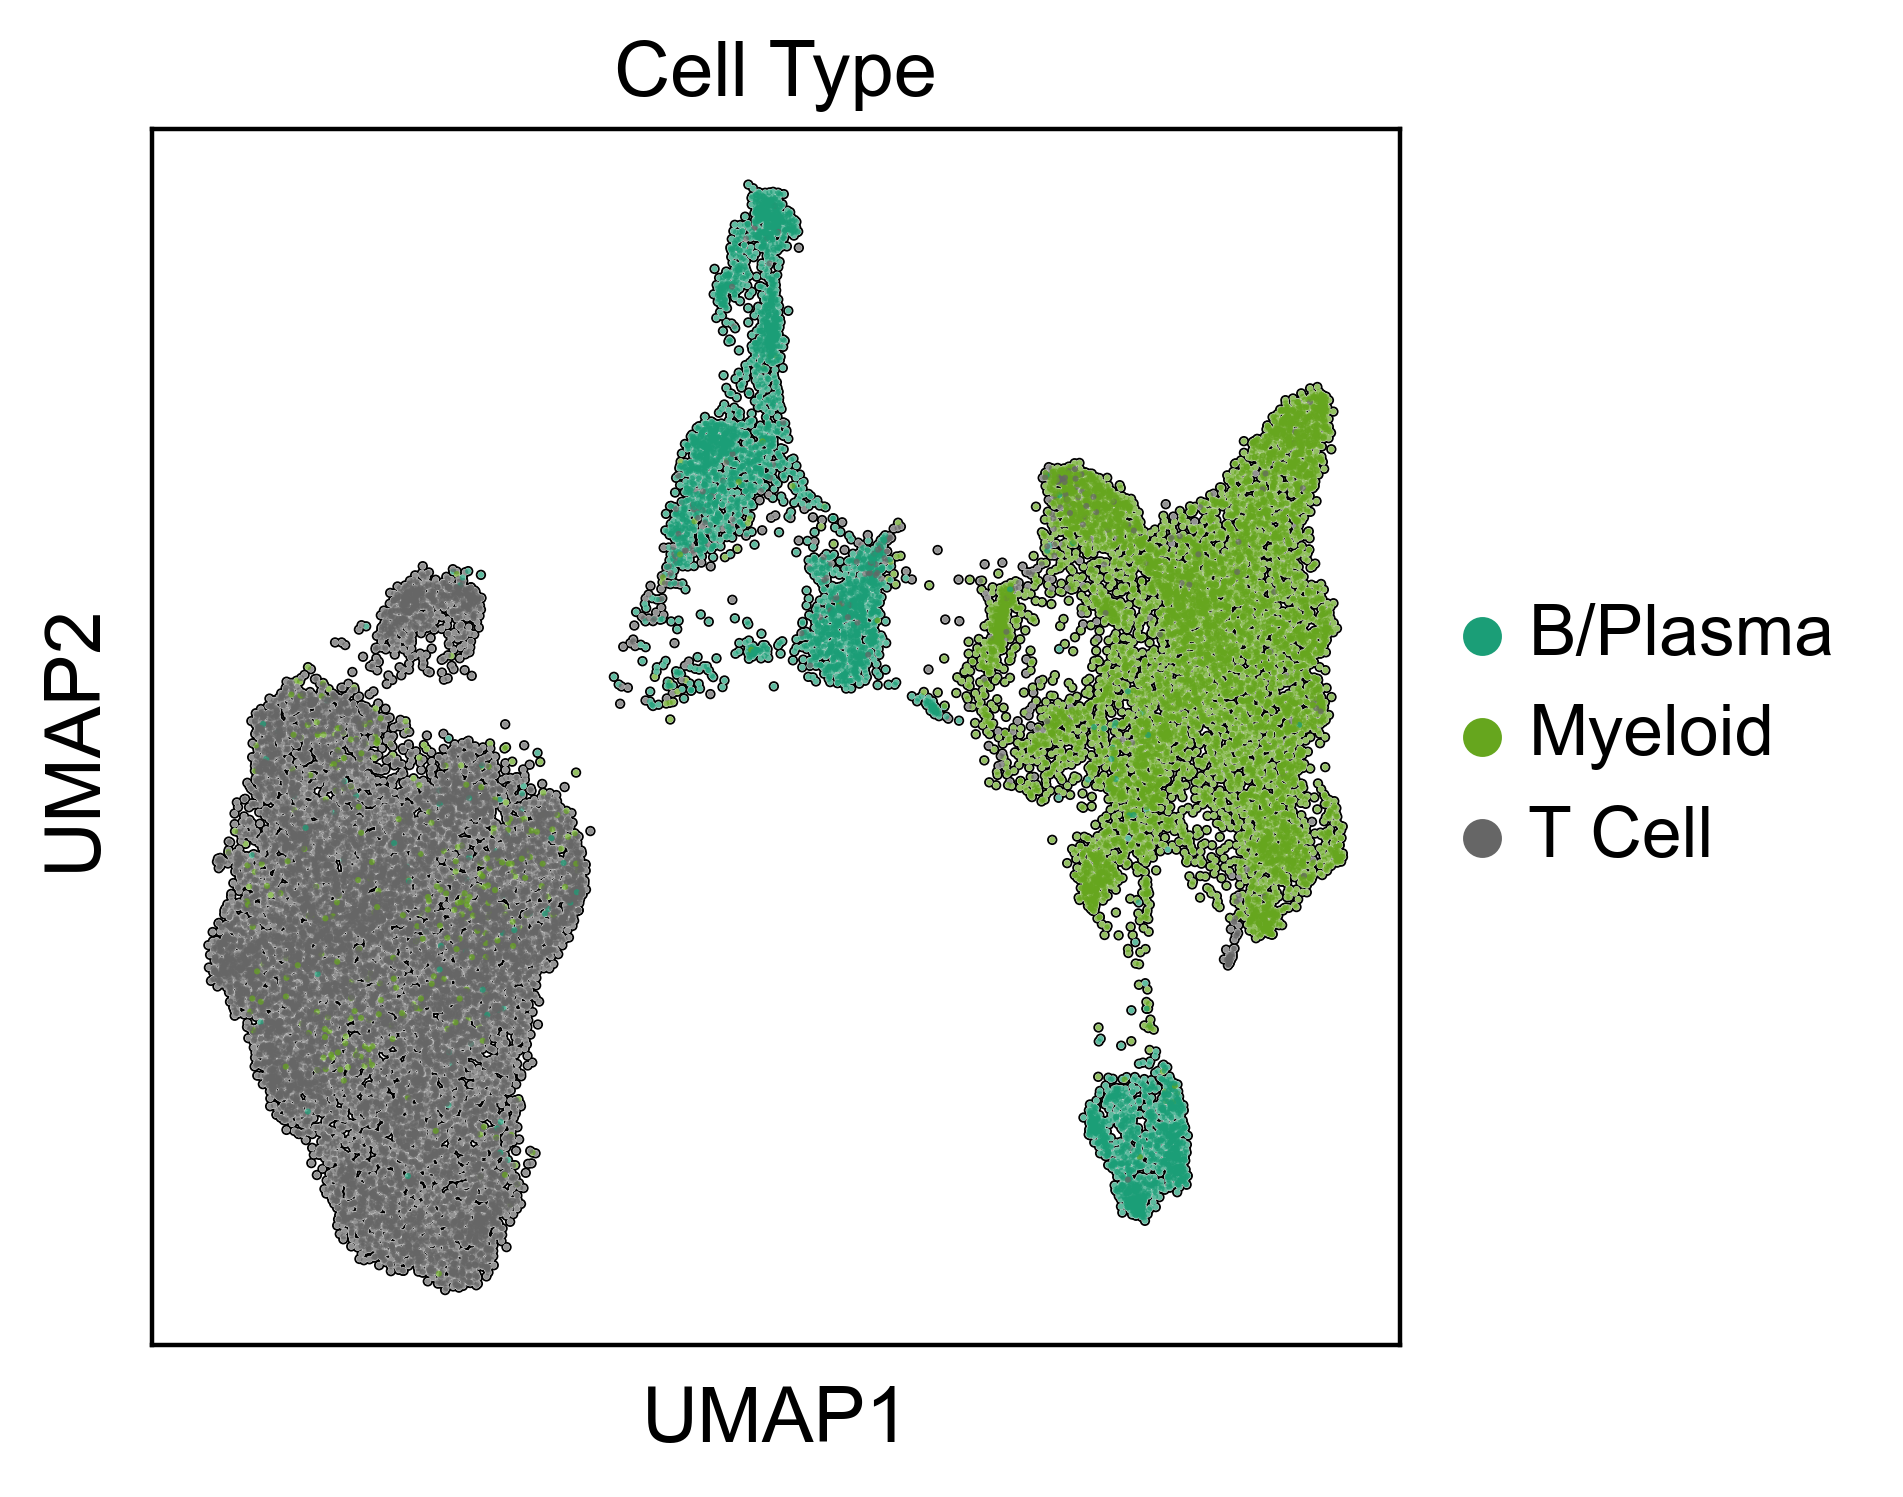

In [15]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=200, facecolor='white')

ct = []
for x in adata.obs["cell_type"]:
    if "T " in x:
        ct.append("T Cell")
    elif "mDC" in x or "cDC" in x:
        ct.append("Myeloid")
    elif "mono" in x.lower():
        ct.append("Myeloid")
    elif "TAM" in x:
        ct.append("Myeloid")
    elif "B " in x or "pDC" in x:
        ct.append("B/Plasma")
    elif "NK" in x:
        ct.append("T Cell")
    elif "Th" in x:
        ct.append("T Cell")
    elif "Mast" in x:
        ct.append("Myeloid")
    else:
        ct.append(x)
print(set(ct))
adata.obs["coarse_cell_type"] = ct

sc.pl.umap(adata,palette="Dark2",color=["coarse_cell_type"],title="Cell Type",
           add_outline=True)

In [25]:
import pandas

markers = dict()
markers["T Cell"] = ["CD3D","CD3G","CD3E"]
markers["B/Plasma"] = ["CD79A","CD79B","MS4A1"]
markers["Myeloid"] = ["LYZ","CST3","AIF1"]

In [26]:
annotated_adata = cembed.phenotype_probability(adata,markers)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24834/24834 [00:00<00:00, 86842.44it/s]


T Cell
B/Plasma
Myeloid


/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.0.1-py3.9.egg/genevector/embedding.py:587: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[target_col] = ct


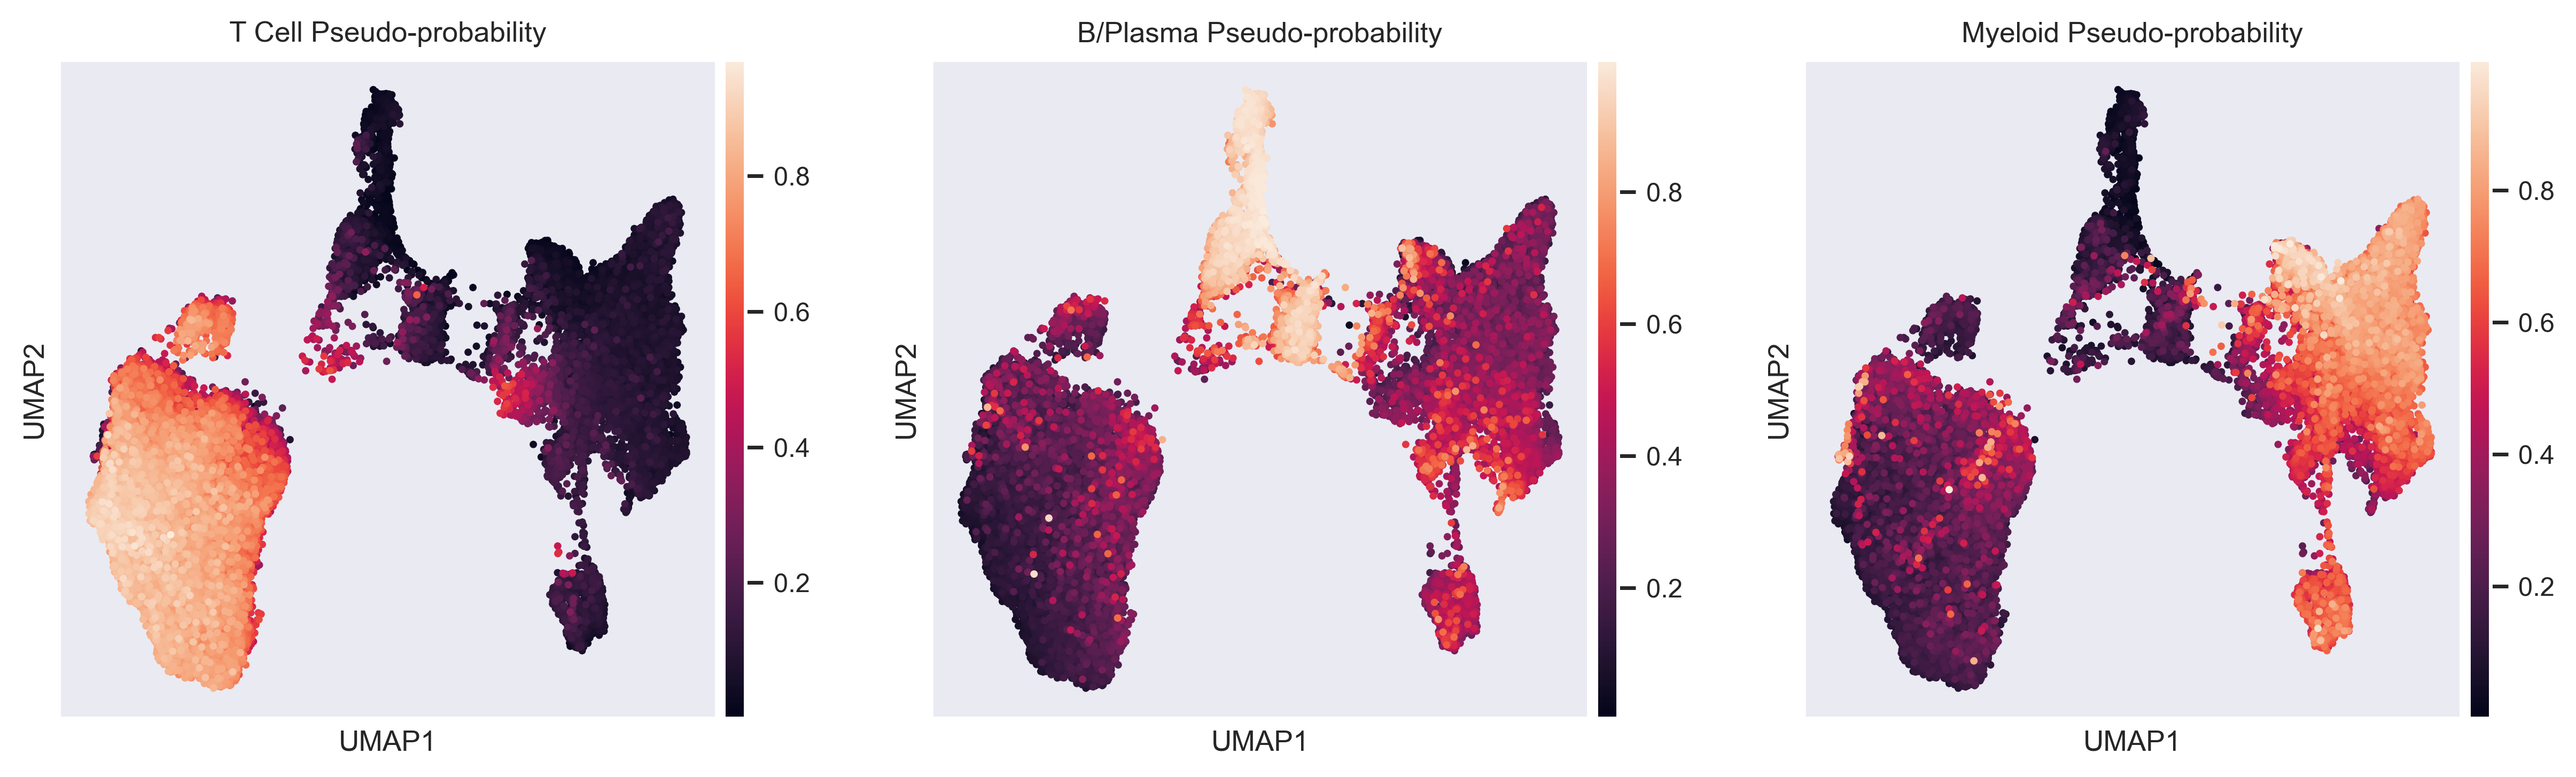

In [27]:
import seaborn as sns
sns.set(font_scale=0.8)
prob_cols = [x for x in annotated_adata.obs.columns.tolist() if "Pseudo-probability" in x]
sc.pl.umap(annotated_adata,color=prob_cols,size=25)

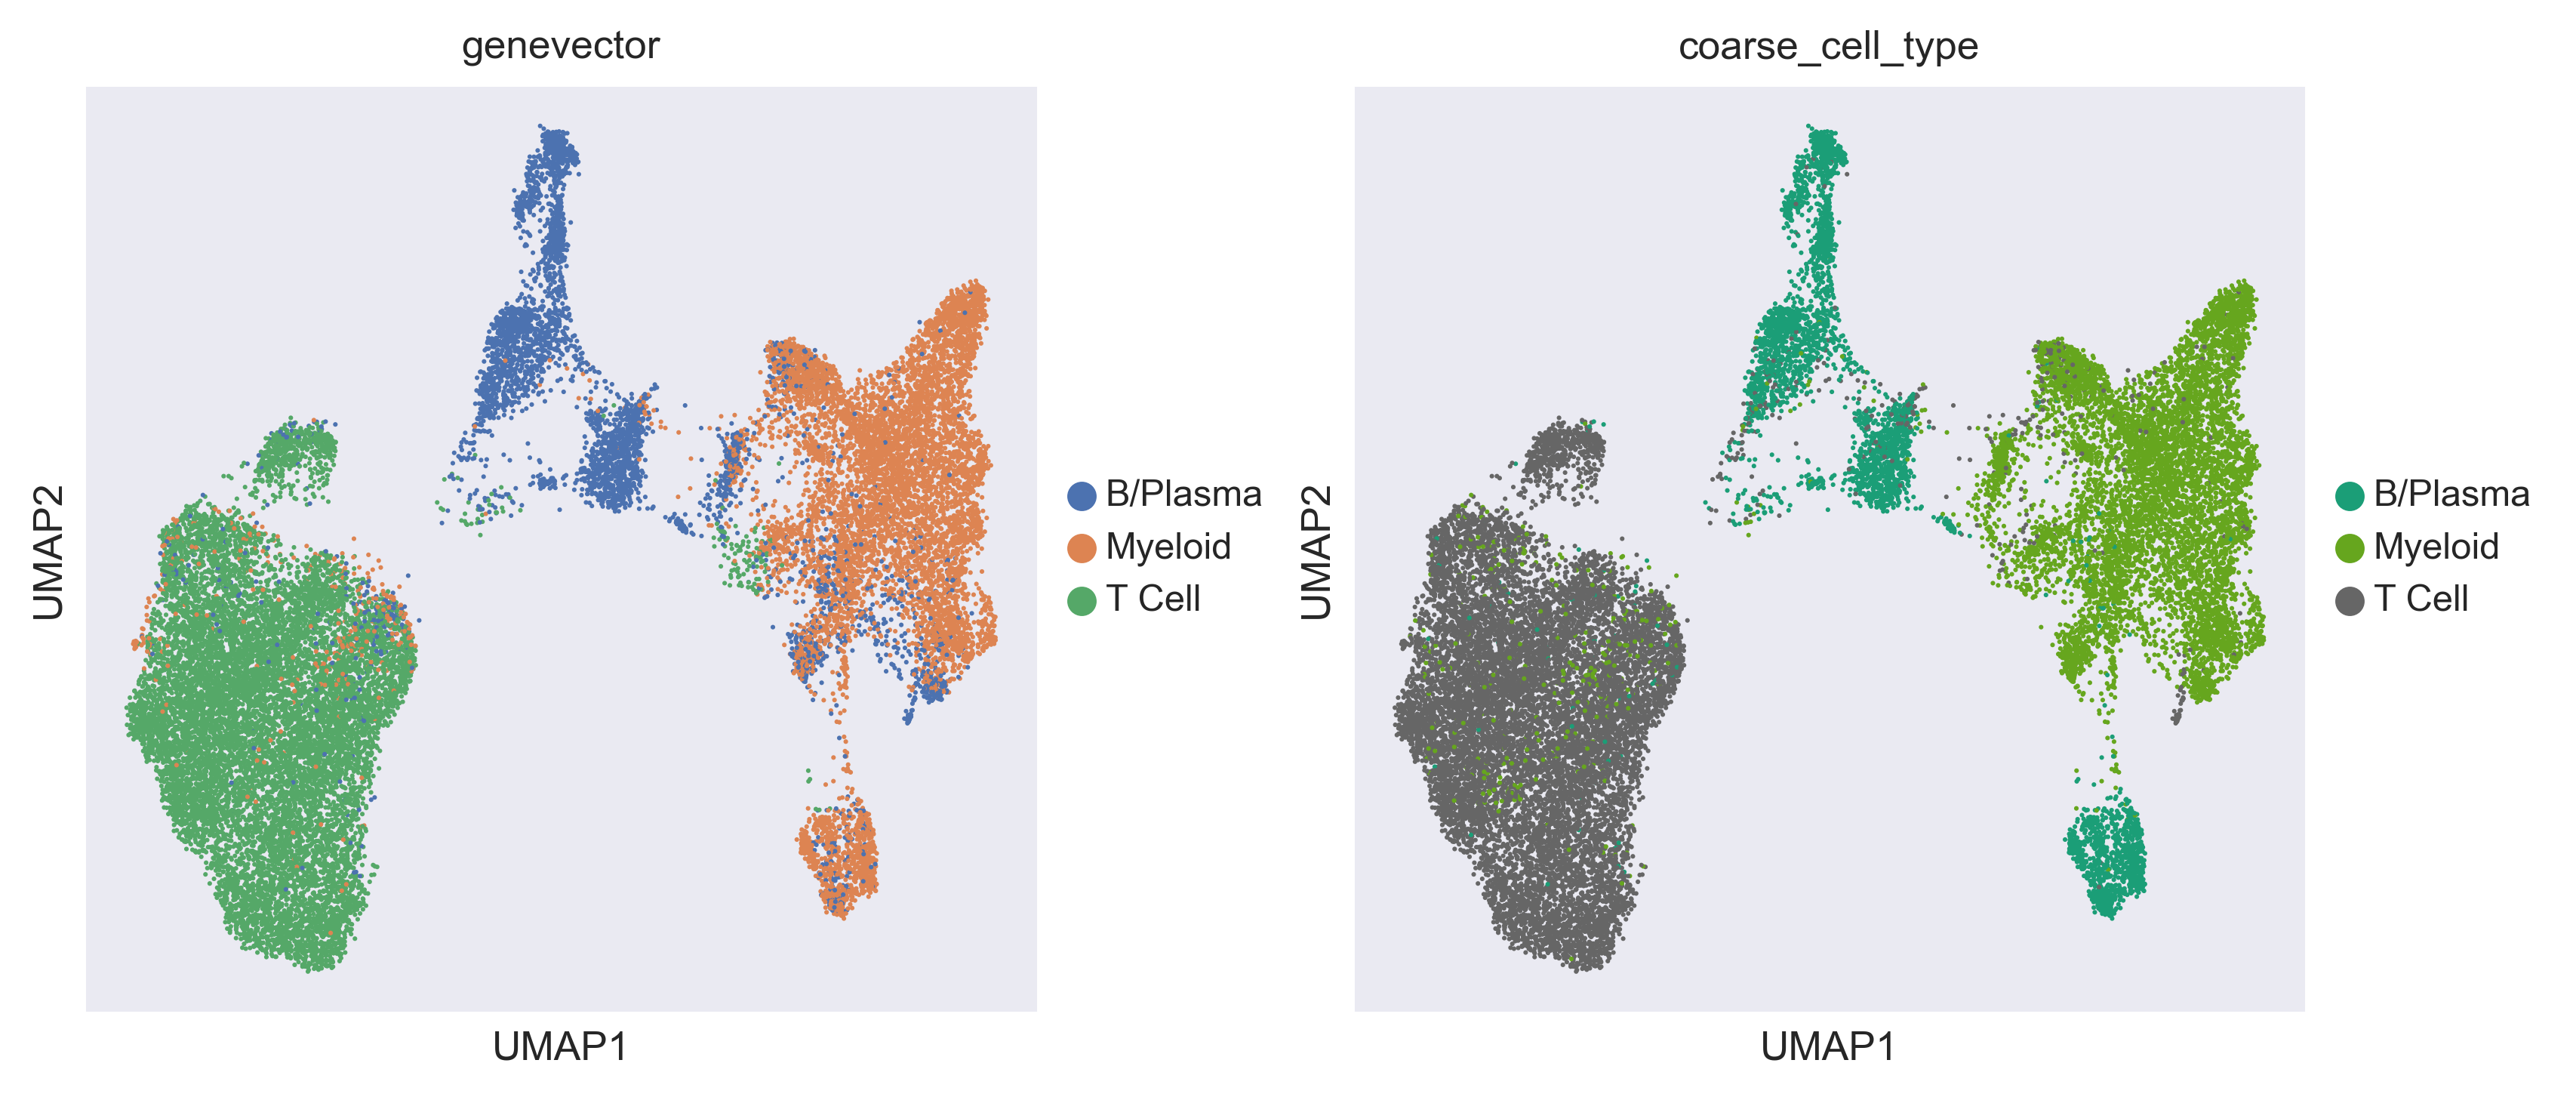

In [28]:
sc.pl.umap(annotated_adata,color=["genevector","coarse_cell_type"])

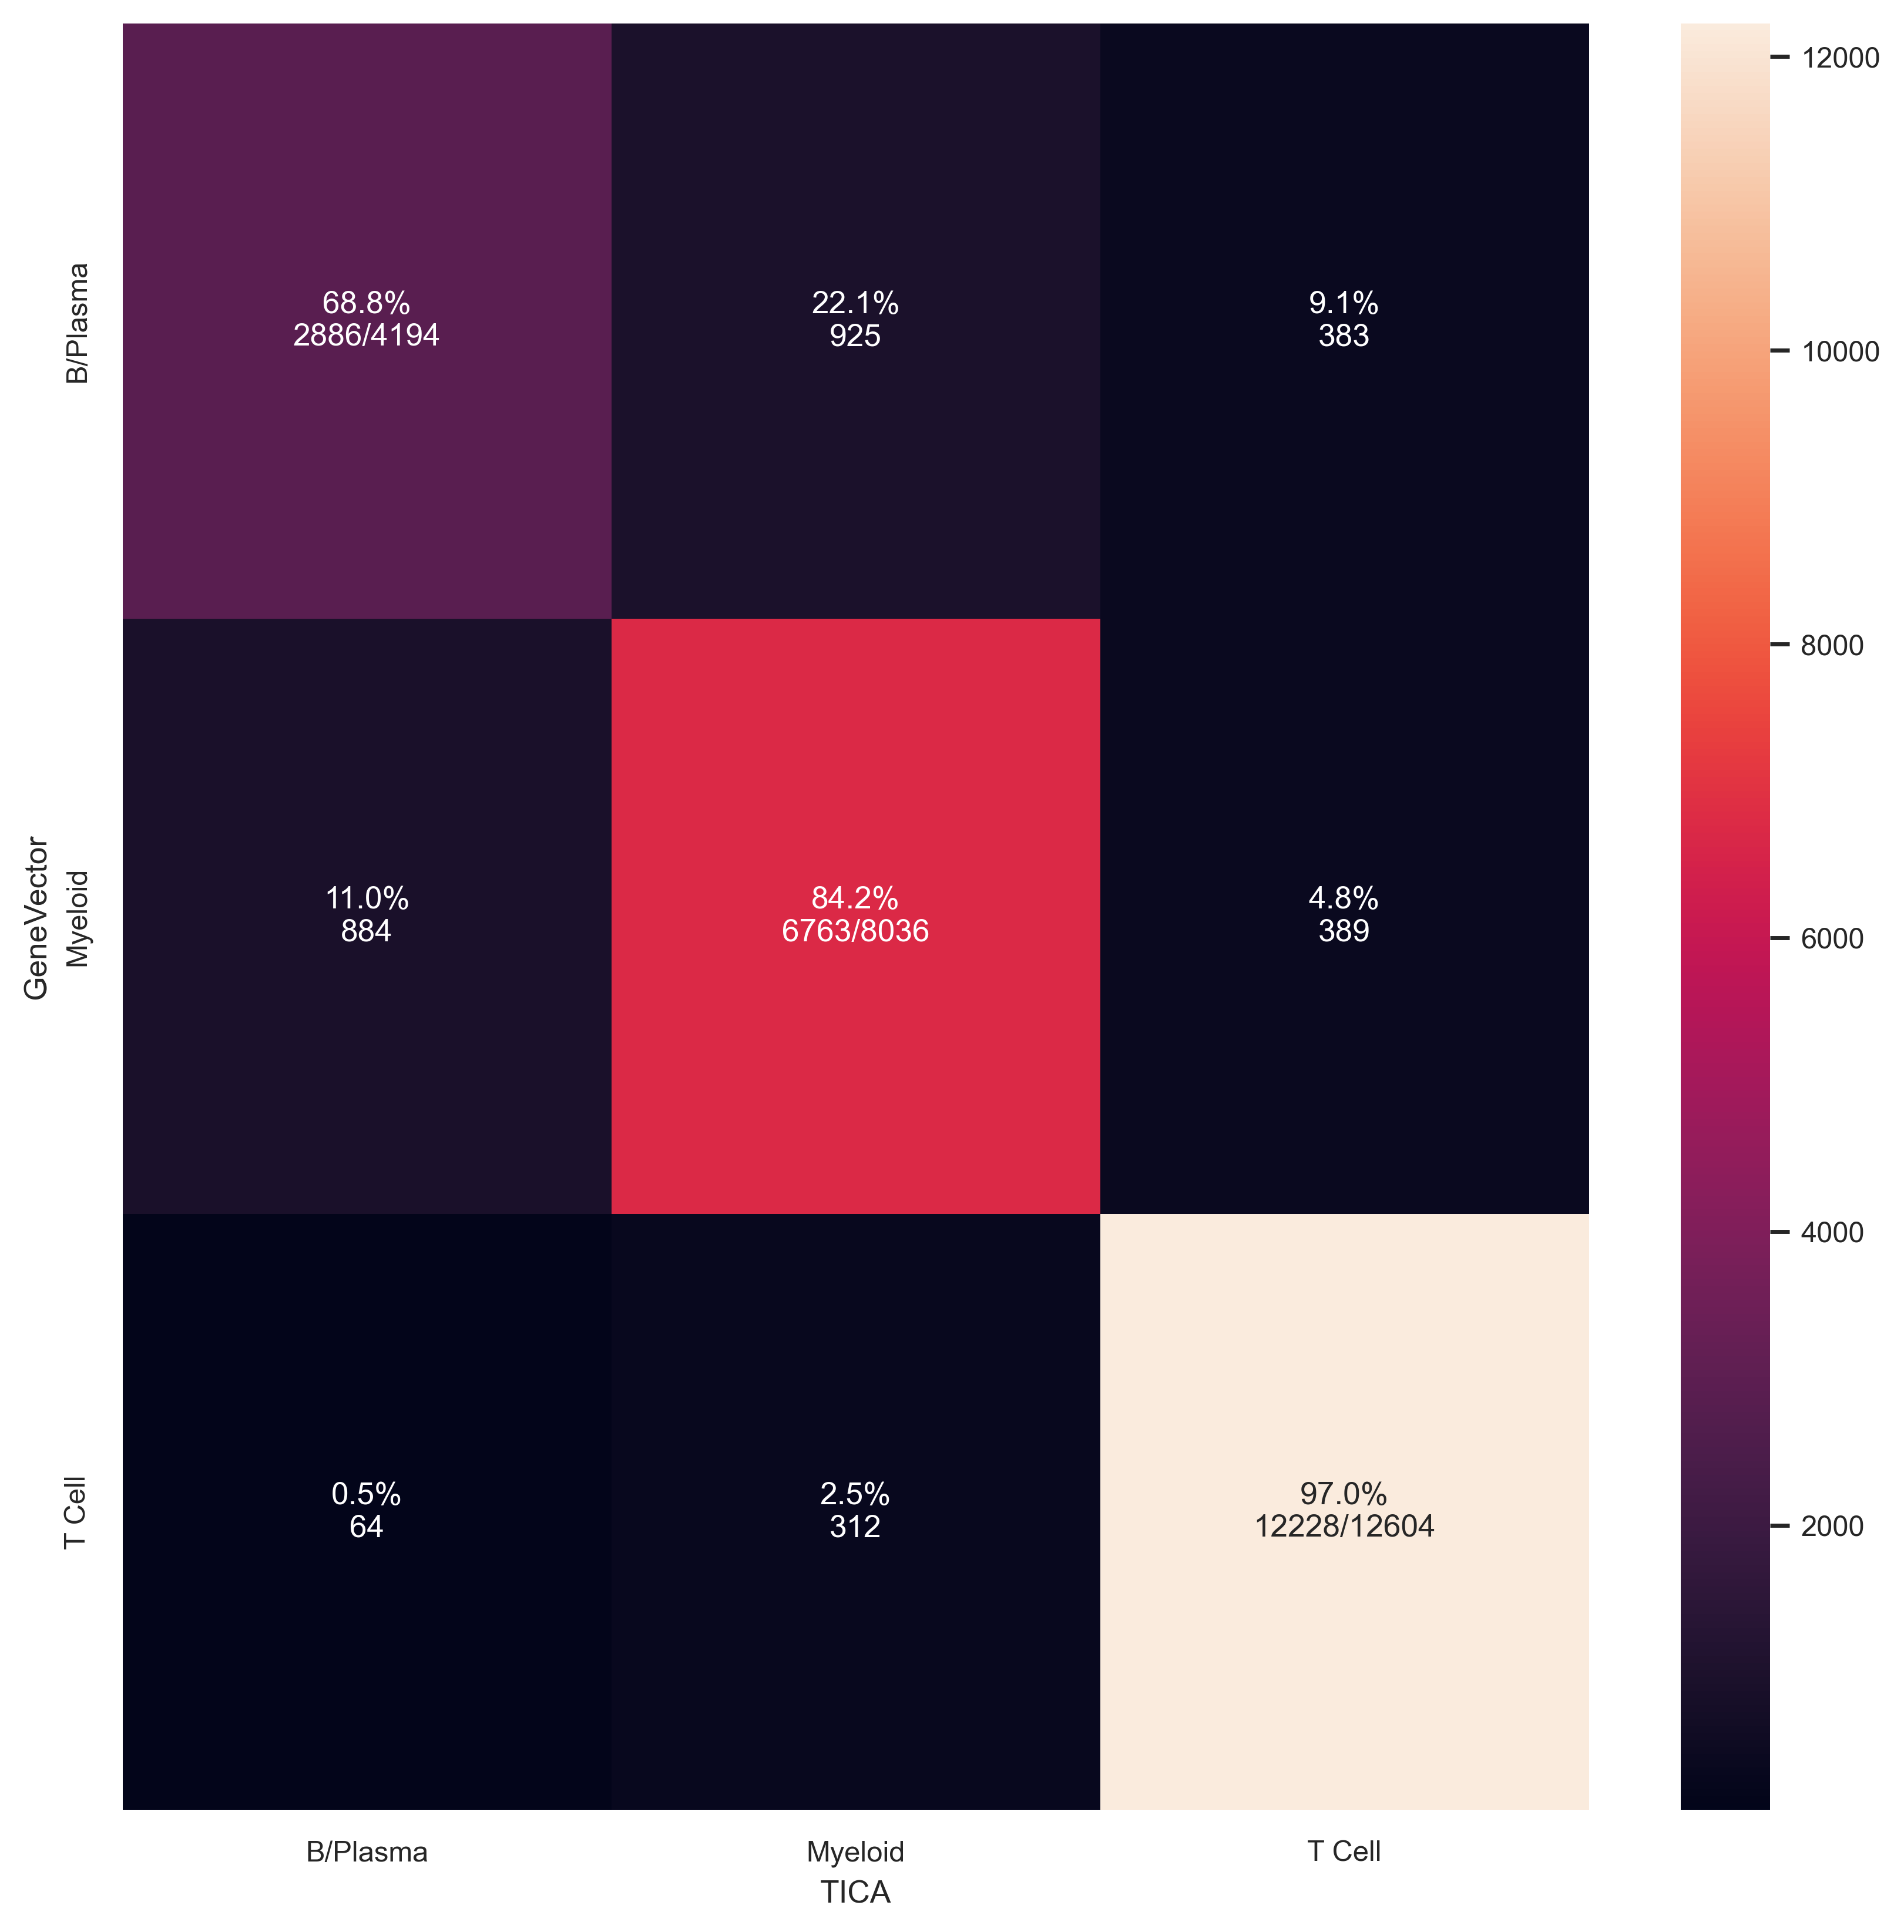

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

gv_ct = annotated_adata.obs["genevector"].tolist()
tica_ct = annotated_adata.obs["coarse_cell_type"].tolist()
def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'GeneVector'
    cm.columns.name = 'TICA'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)

plot_cm(gv_ct,tica_ct)